<a href="https://colab.research.google.com/github/pea2/CSCE623-Project/blob/main/sentiment_v9_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code Source

https://www.kaggle.com/kritanjalijain/twitter-sentiment-analysis/notebook

https://www.kaggle.com/smitshah00/sentiment-analysis-ml-rnn

https://www.kaggle.com/lykin22/twitter-sentiment-analysis-with-naive-bayes-85-acc

Data Source

https://www.kaggle.com/kazanova/sentiment140



In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


Set current working directory to Google Drive 

In [2]:
# set current working directory to Google Drive to retrive data
from google.colab import drive 
drive.mount('/content/drive')
import os
%cd /content/drive/My\ Drive/Colab\ Notebooks/Thesis/
os.getcwd()

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Thesis


'/content/drive/My Drive/Colab Notebooks/Thesis'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

# Read in data

In [3]:
import pandas as pd
data_raw = pd.read_csv('02 1.6 mil sentiment(neg pos).csv', encoding = 'latin', header=None)

# Sequester test set

In [5]:
pd.set_option('display.max_colwidth', None)
data_raw.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [8]:

from sklearn.model_selection import train_test_split

# first column is target column, separate it out for later train-test spliting
data_y = data_raw.loc[:,0] # first column
data_not_y = data_raw.iloc[:,1:6] # 2nd column to 6th column

# train-test split: 80-20
# set random state using numpy.random.RandomState so that each time calls the function, the split is not exactly the same

random_state = 9363

X_train, X_test, y_train, y_test = train_test_split(data_not_y, data_y, 
                                                    test_size = 0.20, 
                                                    random_state=random_state, 
                                                    stratify = data_raw[0])

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape:  ', X_test.shape)
print('y_test.shape:  ', y_test.shape)
print('\ntraining set target counts per class:\n', y_train.value_counts(), '\n')
print('test set target counts per class:\n', y_test.value_counts())

X_train.shape:  (1280000, 5)
y_train.shape:  (1280000,)
X_test.shape:   (320000, 5)
y_test.shape:   (320000,)

training set target counts per class:
 4    640000
0    640000
Name: 0, dtype: int64 

test set target counts per class:
 4    160000
0    160000
Name: 0, dtype: int64


# Data exploration

### putting y back with rest of the columns and call the training set "data"

In [10]:
pd.set_option('display.max_colwidth', None)
yy = pd.DataFrame(y_train)
data = yy.join(X_train)
# data.info()
data.head()

,0,1,2,3,4,5
92685,0,1760170029,Sun May 10 20:50:18 PDT 2009,NO_QUERY,bigdog6286,but odds are we are not gonna make it ? http://blip.fm/~60u4i
414082,0,2060740674,Sat Jun 06 19:29:17 PDT 2009,NO_QUERY,TiffanyIPS,Is at Justins being forced to sing by about 3 people.
312468,0,2001536723,Tue Jun 02 01:12:40 PDT 2009,NO_QUERY,lorri79,back from fishing but no fish will try again on the next tide. Taking a walk over to get the paper and some rolls for my bacon. Yum yum.
81414,0,1752713484,Sat May 09 22:44:34 PDT 2009,NO_QUERY,ricosuave22,hangin' out at home playing some online games.....BORED!
397946,0,2056761369,Sat Jun 06 11:44:41 PDT 2009,NO_QUERY,lindatusti,I'm freakin' jealous of @irisvarsi She can go to JB concert in Sweden :'( Why I caaaaaannn't ? :'(


### change column names to be more informative

In [14]:
pd.set_option('display.max_colwidth', None)
data = data.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'text'})
data[0:20]

# alternatively, change column name when reading in data
# data = pd.read_csv('02 1.6 mil sentiment(neg pos).csv',encoding='latin', names = ['target','id','date','query','username','text'])

,target,id,date,query,username,text
92685,0,1760170029,Sun May 10 20:50:18 PDT 2009,NO_QUERY,bigdog6286,but odds are we are not gonna make it ? http://blip.fm/~60u4i
414082,0,2060740674,Sat Jun 06 19:29:17 PDT 2009,NO_QUERY,TiffanyIPS,Is at Justins being forced to sing by about 3 people.
312468,0,2001536723,Tue Jun 02 01:12:40 PDT 2009,NO_QUERY,lorri79,back from fishing but no fish will try again on the next tide. Taking a walk over to get the paper and some rolls for my bacon. Yum yum.
81414,0,1752713484,Sat May 09 22:44:34 PDT 2009,NO_QUERY,ricosuave22,hangin' out at home playing some online games.....BORED!
397946,0,2056761369,Sat Jun 06 11:44:41 PDT 2009,NO_QUERY,lindatusti,I'm freakin' jealous of @irisvarsi She can go to JB concert in Sweden :'( Why I caaaaaannn't ? :'(
359290,0,2045690889,Fri Jun 05 11:05:41 PDT 2009,NO_QUERY,ivanawonderland,i miss my boyfriend terribly and i want this rain/shitty weather to GO AWAY!
140269,0,1880997956,Fri May 22 03:14:42 PDT 2009,NO_QUERY,r2kmoon2,Bleh to the Betamax (Am I too young for that reference?) Why is there a party on Saturday? Ugh. Damn Sunday morning shift. (cont)
929030,4,1759816726,Sun May 10 20:01:47 PDT 2009,NO_QUERY,blak4ever,will be back to tweet in a little while. Hope every1 doesn't have to much fun w/o me
348501,0,2016783347,Wed Jun 03 07:21:12 PDT 2009,NO_QUERY,BBCasper,You know what sucks? When I get my Tour...I won't have all of the apps I have now. This makes me very sad.
637519,0,2234210958,Thu Jun 18 22:37:47 PDT 2009,NO_QUERY,JeremyAsgari,@roxycottontail why philly???? Why???? lol babyrox is gonna hold it down I'm sure


In [15]:
data[20002:20010]

,target,id,date,query,username,text
1044249,4,1957422349,Fri May 29 00:27:14 PDT 2009,NO_QUERY,SoulAfrodisiac,"@viviansessoms Short version - it's like Twitterberry, but BETTER. http://ubertwitter.com/"
589598,0,2217040035,Wed Jun 17 20:18:33 PDT 2009,NO_QUERY,Alysha1721,hates prank callers at 10 o'clock in the morning especially when they try to put on an indian accent and they sound scottish/jamacan
1011767,4,1881137226,Fri May 22 03:43:31 PDT 2009,NO_QUERY,aprilyim,@yateoh Hello twitter noob What phone do u have at the moment? tweet me via web 1st lah
333029,0,2013229599,Tue Jun 02 22:11:37 PDT 2009,NO_QUERY,macmollison,"@shaddih I emailed the billshare author to ask if the site would stay online for a long time, he never wrote back"
412526,0,2060376275,Sat Jun 06 18:47:25 PDT 2009,NO_QUERY,PrinceLateef,No Baritone for a While Band was Fun. I ate too much junk food Smash Bros Brawl with Catherine was Wicked Love that Girl Miami next Wknd
228886,0,1978358388,Sat May 30 23:07:14 PDT 2009,NO_QUERY,alee_x,@markhoppus Are you talking to me??... btw but you're not follow me
824667,4,1556291532,Sat Apr 18 22:17:29 PDT 2009,NO_QUERY,nikkirc,is going to try to go to bed but I might be back to see if JK tweets! Good Knight...maybe!
1295997,4,2003880644,Tue Jun 02 07:18:18 PDT 2009,NO_QUERY,Berndhard,@Minifuzzi good to hear


### checking if there are mising values

In [ ]:
missing_data = data.isna().sum().sort_values(ascending=False)
percentage_missing = round((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info.style.background_gradient()

,Missing values,Percentage
text,0,0.000000
username,0,0.000000
query,0,0.000000
date,0,0.000000
id,0,0.000000
target,0,0.000000


## Target values exploration

### negative positive classes

In [ ]:
# target classes: 0 and 4
data['target'].unique()

array([0, 4])

In [ ]:
# see class 0 text, observed that class 4 are negative tweets
pd.set_option('display.max_colwidth', None)
data[data['target']==0]['text'].head()

92685                                                                                 but odds are we are not gonna make it  ? http://blip.fm/~60u4i
414082                                                                                        Is at Justins being forced to sing by about 3 people. 
312468    back from fishing but no fish  will try again on the next tide.  Taking a walk over to get the paper and some rolls for my bacon. Yum yum.
81414                                                                                      hangin' out at home playing some online games.....BORED! 
397946                                           I'm freakin' jealous of @irisvarsi  She can go to JB concert in Sweden :'( Why I caaaaaannn't ? :'(
Name: text, dtype: object

In [ ]:
# see class 4 text, since class 0 is negative tweets, it seems class 4 is positive tweets
pd.set_option('display.max_colwidth', None)
data[data['target']==4]['text'].head()

929030       will be back to tweet in a little while. Hope every1 doesn't have to much fun w/o me 
1164592                                                                     @Zatannna Which one ? 
970520                                                           has a big cheese face right now! 
1275874    @thekellanlutz http://twitpic.com/6f6w6 - You love your hats  to sexy for the world O_O
1568651                   Synced new podcasts, so I'm ready to go to bed. Goodnight everyone!  î?
Name: text, dtype: object

### replace class 0 with negative, class 4 with positive

In [16]:
# replace class 0 with negative, class 4 with positive
data['target'] = data['target'].replace([0,4], ['Negative', 'Positive'])
data['target'].unique()

array(['Negative', 'Positive'], dtype=object)

### ploting classes counts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Positive    640000
Negative    640000
Name: target, dtype: int64

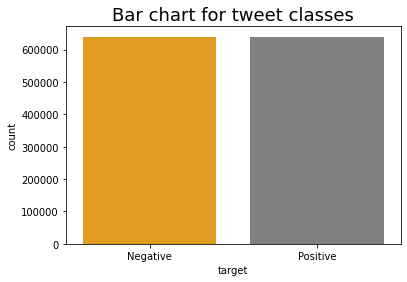

In [ ]:
# plotting classes count in a bar chart
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.countplot(data['target'], palette = ['orange', 'grey'])
plt.title('Bar chart for tweet classes',fontsize=18)
plt.show
data.target.value_counts()

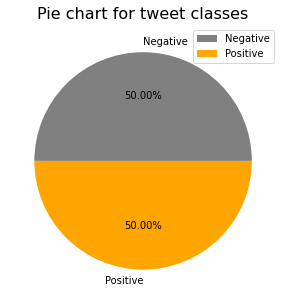

In [ ]:
# plotting classes count in a pie chart
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
targets = data.groupby('target').size()
targets.plot(kind='pie', subplots=True, figsize=(5,5), autopct = "%.2f%%", colors=['grey','orange'])
plt.title("Pie chart for tweet classes",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
data['target'].value_counts()

Positive    640000
Negative    640000
Name: target, dtype: int64

## Text exploration

In [17]:
# compute length of each tweet, add the length column to dataframe
data['length'] = data.text.str.split().apply(len)

### tweet length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


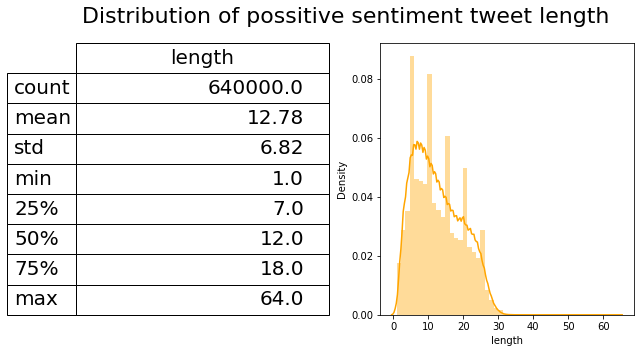

In [ ]:
# plot distribution of tweet length 

import seaborn as sns

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(122)
sns.distplot(data[data['target']=='Positive']['length'], ax=ax1,color='orange')
describe = data.length[data.target=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 20
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of possitive sentiment tweet length', fontsize=22)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


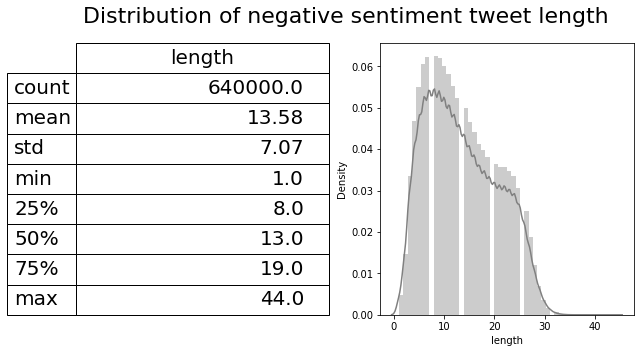

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(122)
sns.distplot(data[data['target']=='Negative']['length'], ax=ax1,color='grey')

ax2 = fig.add_subplot(121)
describe = data.length[data.target=='Negative'].describe().to_frame().round(2)
ax2.axis('off')
font_size = 20
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of negative sentiment tweet length', fontsize=22)

plt.show()

Text(0.5, 1.0, 'Distribution for word count per tweet')

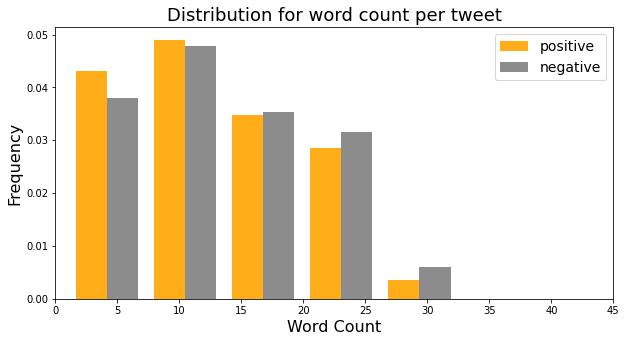

In [18]:
# alternatively, plot word count distribution for both positive and negative 
p = data['length'][data.target == 'Positive']
n = data['length'][data.target == 'Negative']
plt.figure(figsize=(10,5))
plt.xlim(0,45)
plt.xlabel('Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.hist([p, n], color=['orange','grey'], alpha=0.9, label=['positive','negative'], density=True)
plt.legend(loc='upper right', fontsize=14)
plt.title('Distribution for word count per tweet', fontsize = 18)

### Top 10 users with most frequent tweets

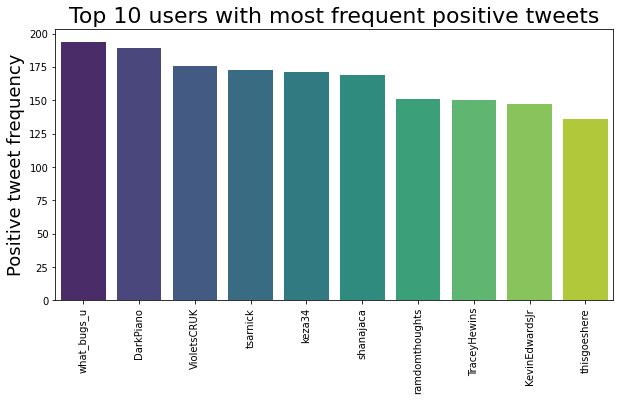

In [ ]:
plt.figure(figsize=(10,5))
common_keyword=sns.barplot(x=data[data['target']=='Positive']['username'].value_counts()[:10].index, \
                           y=data[data['target']=='Positive']['username'].value_counts()[:10],palette='viridis')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Positive tweet frequency',fontsize=18)
plt.title('Top 10 users with most frequent positive tweets',fontsize=22)
plt.show()

In [ ]:
# check out what does the most positive user tweet about, a bot!
pd.set_option('display.max_colwidth', None) 
data[data['username']=='what_bugs_u'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,target,id,date,query,username,text,length
1322303,Positive,2014783070,Wed Jun 03 02:40:23 PDT 2009,NO_QUERY,what_bugs_u,"@Loollabelle10 why limit your story to 140 ch. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22
1205546,Positive,1986571167,Sun May 31 19:01:12 PDT 2009,NO_QUERY,what_bugs_u,"@tashapastor why limit your story to 140 ch. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22
1294571,Positive,2003535748,Tue Jun 02 06:42:38 PDT 2009,NO_QUERY,what_bugs_u,"@ShannonClagett why limit your story to 140 ch. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22
1142790,Positive,1977351706,Sat May 30 20:46:44 PDT 2009,NO_QUERY,what_bugs_u,"@EmStar32 why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22
1163951,Positive,1979716275,Sun May 31 04:13:02 PDT 2009,NO_QUERY,what_bugs_u,"@Monza972 why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",22


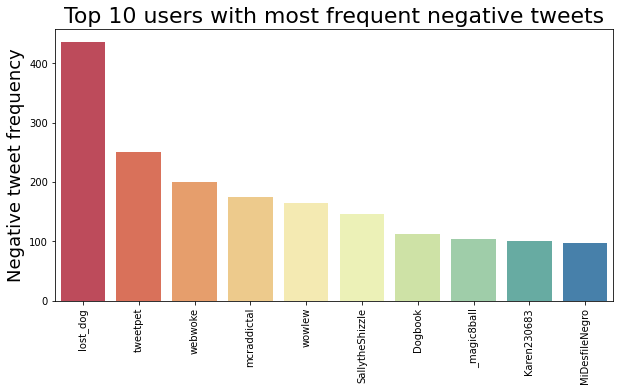

In [ ]:
plt.figure(figsize=(10,5))
common_keyword=sns.barplot(x=data[data['target']=='Negative']['username'].value_counts()[:10].index, \
                           y=data[data['target']=='Negative']['username'].value_counts()[:10],palette='Spectral')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Negative tweet frequency',fontsize=18)
plt.title('Top 10 users with most frequent negative tweets',fontsize=22)
plt.show()

In [ ]:
# check out what does the most nagative user tweet about, a bot! 
pd.set_option('display.max_colwidth', None)
data[data['username']=='lost_dog'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,target,id,date,query,username,text,length
632102,Negative,2232560742,Thu Jun 18 20:04:49 PDT 2009,NO_QUERY,lost_dog,@lesliepardo I am lost. Please help me find a good home.,11
67309,Negative,1692256200,Sun May 03 19:36:23 PDT 2009,NO_QUERY,lost_dog,@unaverage_joe I am lost. Please help me find a good home.,11
774224,Negative,2321445062,Wed Jun 24 21:03:57 PDT 2009,NO_QUERY,lost_dog,@Paigejac I am lost. Please help me find a good home.,11
182892,Negative,1967286532,Fri May 29 19:18:11 PDT 2009,NO_QUERY,lost_dog,@bradymcl I am lost. Please help me find a good home.,11
110800,Negative,1824950969,Sun May 17 03:40:13 PDT 2009,NO_QUERY,lost_dog,@JeanBurgess I am lost. Please help me find a good home.,11


### Wordclouds

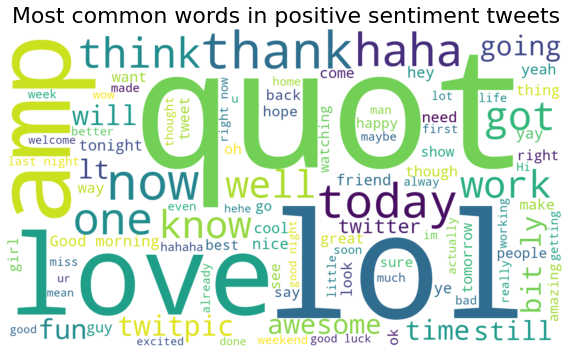

In [ ]:
# 45-second run
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(10,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1400, \
                       height=800, background_color="white").generate(" ".join(data[data.target=='Positive'].text))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in positive sentiment tweets',fontsize=22)
plt.show()

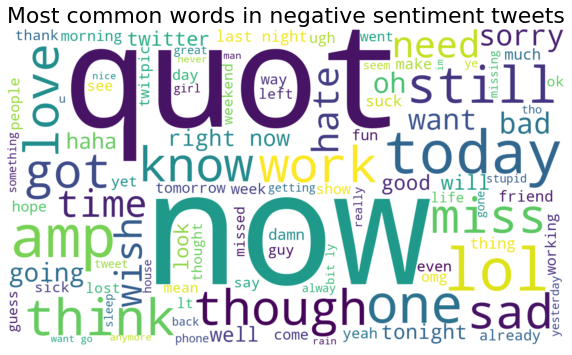

In [ ]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(10,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1400, \
                       height=800, background_color="white").generate(" ".join(data[data.target=='Negative'].text))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in negative sentiment tweets',fontsize=22)
plt.show()

# Text preprocessing

In [ ]:
# remove noisy columns
print(data.columns)
data.drop(['id','date','query','username','length'], axis=1, inplace=True)
print(data.columns)

# replace positive sentiment with 1 and negative sentiment with 0
data.target = data.target.replace({'Positive' : 1, 'Negative' : 0})

Index(['target', 'id', 'date', 'query', 'username', 'text', 'length'], dtype='object')
Index(['target', 'text'], dtype='object')


### Emoji, smiley, contraction, cleaning preprocessing

### functions to clean text - Add new column to the data called "clean"
***----------------  RUN ---------------------------***

In [ ]:
mystr = ":3 shouldn't XP =p :S :) ;) >.< won't.you've http://www.hello.com check !@"
clean_data(mystr)

'happy should not happy happy happy happy sad won you ve check'

In [ ]:
import re

################################################################################
################################################################################
def replace_emojis(t):
    '''
    This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad"
    '''
    emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                  "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                  r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                  "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                  "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                  "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

    emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                  "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                  "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                  "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                  "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

    words = t.split()
    reformed = []
    for w in words:
        if w in emoji_happy:
            reformed.append("happy")
        elif w in emoji_sad:
            reformed.append("sad") 
        else:
            reformed.append(w)
    t = " ".join(reformed)
    return t
################################################################################
################################################################################
def replace_smileys(t):
    '''
    This function replaces happy smileys with "happy" and sad smileys with "sad"
    '''
    emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
      ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
      '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
      'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

    emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
      ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
      ':c', ':{', '>:\\', ';('])  

    words = t.split()
    reformed = []
    for w in words:
        if w in emoticons_happy:
            reformed.append("happy")
        elif w in emoticons_sad:
            reformed.append("sad") 
        else:
            reformed.append(w)
    t = " ".join(reformed)
    return t
################################################################################
################################################################################
def replace_contractions(t):
    '''
    This function replaces english lanuage contractions, eg., "shouldn't" with "should not"
    '''
    cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
    "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
    "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
    "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
    "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
    "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
    "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
    "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
    "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
    "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
    
    words = t.split()
    reformed = []
    for w in words:
        if w in cont:
          reformed.append(cont[w])
        else:
          reformed.append(w)
    t = " ".join(reformed)
    return t  
################################################################################
################################################################################
def remove_single_letter_words(t):
    '''
    This function removes words that are single characters
    '''
    words = t.split()
    reformed = []
    for w in words:
        if len(w) > 1:
            reformed.append(w)
    t = " ".join(reformed)
    return t 
################################################################################
################################################################################

# define emojis
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def clean_data(t):
    '''
    This function cleans the tweets
    '''
    t = t.lower() # convert to lowercase
    t = replace_emojis(t) # replace unicode emojis with their associated emotions
    t = replace_smileys(t) # replace handwritten emojis with their associated emotions
    t = replace_contractions(t) # replace English short forms with their long form
    t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
    t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
    t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
    t = re.sub('#', '', t) # remove '#'
    t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
    t = re.sub('@[^\s]+', '', t) # remove usernames
    t = re.sub('RT[\s]+', '', t) # remove retweet 'RT'
    t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
    t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', ' ', t)  ## replace punctuations with space ###
    t = t.replace('\\\\', '')
    t = t.replace('\\', '')
    t = remove_single_letter_words(t) # removes single letter words
    t = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(t).lower()).strip() # remove mentions and links in tweets
    
    return t
################################################################################
################################################################################

Add new column to the data called "clean"

In [ ]:
print("Cleaning tweets...\n")
print("Convert to lowercase")
print("Replace unicode emojis with their associated emotions")
print("Replace handwritten emojis with their associated emotions")
print("Replace English short forms with their long form")
print("Remove all other unicoded emojis")
print("Remove NON- ASCII characters")
print("Remove numbers")
print("Remove \"#\" ")
print("Remove \"@\" ")
print("Remove usernames")
print("Remove \'RT\' ")
print("Remove URLs and links")
print("Replace punctuations with space")
print("Remove single letter words")
print("Remove mentions and links in tweets\n")

data['clean'] = data['text'].apply(clean_data)
print("Tweets have been cleaned.")

Cleaning tweets...

Convert to lowercase
Replace unicode emojis with their associated emotions
Replace handwritten emojis with their associated emotions
Replace English short forms with their long form
Remove all other unicoded emojis
Remove NON- ASCII characters
Remove numbers
Remove "#" 
Remove "@" 
Remove usernames
Remove 'RT' 
Remove URLs and links
Replace punctuations with space
Remove single letter words
Remove mentions and links in tweets

Tweets have been cleaned.


### check if data is clean and make WordClouds

In [ ]:
pd.set_option('display.max_colwidth', None)
data.clean.head()
# looks good

92685                                                                                                   but odds are we are not gonna make it
414082                                                                                     is at justins being forced to sing by about people
312468    back from fishing but no fish will try again on the next tide taking walk over to get the paper and some rolls for my bacon yum yum
81414                                                                                      hangin out at home playing some online games bored
397946                                                        am freakin jealous of she can go to jb concert in sweden sad why caaaaaannn sad
Name: clean, dtype: object

In [ ]:
# compare with prior cleaning the tweets
# see class 0 text, observed that class 4 are negative tweets
pd.set_option('display.max_colwidth', None)
data[data['target']==0]['text'].head()

92685                                                                                 but odds are we are not gonna make it  ? http://blip.fm/~60u4i
414082                                                                                        Is at Justins being forced to sing by about 3 people. 
312468    back from fishing but no fish  will try again on the next tide.  Taking a walk over to get the paper and some rolls for my bacon. Yum yum.
81414                                                                                      hangin' out at home playing some online games.....BORED! 
397946                                           I'm freakin' jealous of @irisvarsi  She can go to JB concert in Sweden :'( Why I caaaaaannn't ? :'(
Name: text, dtype: object

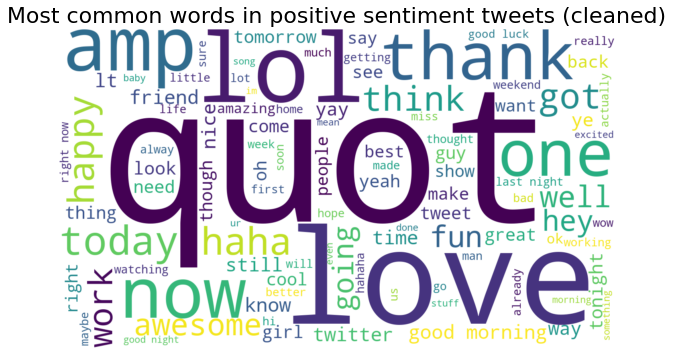

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1400, \
                       height=800, background_color="white").generate(" ".join(data[data.target==1].clean))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in positive sentiment tweets (cleaned)',fontsize=22)
plt.show()

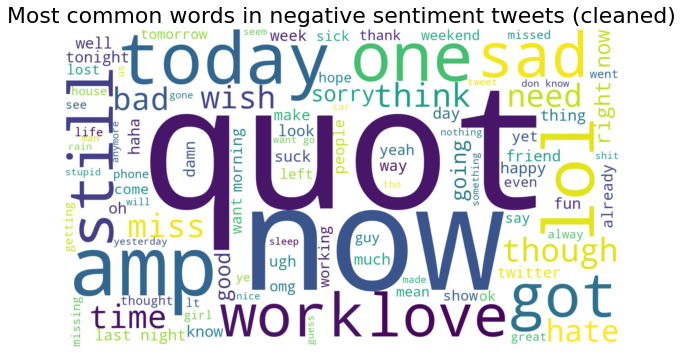

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1400, \
                       height=800, background_color="white").generate(" ".join(data[data.target==0].clean))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in negative sentiment tweets (cleaned)',fontsize=22)
plt.show()

### Text normalization - Add new column to the data called "normal"
***---------------- 7 min RUN ---------------------------***

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = nltk.corpus.stopwords.words('english')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
porter = nltk.PorterStemmer()

def normalize_data(doc):
  
  # tokenize text
  doc = nltk.tokenize.word_tokenize(doc)

  # remove stops words
  doc = [ w for w in doc if w not in (nltk_stopwords and sklearn_stopwords) ]

  # lemmatization
  doc = [wnl.lemmatize(w) for w in doc]

  # stemming
  doc = [porter.stem(w) for w in doc]

  # remove single letter
  doc = [w for w in doc if len(w)>1]

  return ' '.join(doc)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Add new column to the data called "normal"

In [ ]:
# 6 minutes 43 seconds
data['normal'] = data['clean'].apply(normalize_data)

### compare with prior normalization

In [ ]:
pd.set_option('display.max_colwidth', None)
data.normal.head()

92685                                           odd gon na make
414082                                   justin forc sing peopl
312468    fish fish tri tide take walk paper roll bacon yum yum
81414                          hangin home play onlin game bore
397946      freakin jealou jb concert sweden sad caaaaaannn sad
Name: normal, dtype: object

In [ ]:
pd.set_option('display.max_colwidth', None)
data.clean.head()

92685                                                                                                   but odds are we are not gonna make it
414082                                                                                     is at justins being forced to sing by about people
312468    back from fishing but no fish will try again on the next tide taking walk over to get the paper and some rolls for my bacon yum yum
81414                                                                                      hangin out at home playing some online games bored
397946                                                        am freakin jealous of she can go to jb concert in sweden sad why caaaaaannn sad
Name: clean, dtype: object

### Convert text to word frequency vectors

In [ ]:
pd.set_option('display.max_colwidth', None)
data[5080:5090]

,target,id,date,query,username,text,length,clean,normal
1270925,Positive,2000474770,Mon Jun 01 22:11:50 PDT 2009,NO_QUERY,Rivrob,3 more early starts and then a proper 2 day weekend for the first time since Xmas.Forgotten what it's like,20,more early starts and then proper day weekend for the first time since xmas forgotten what it is like,earli start proper day weekend time xma forgotten like
643495,Negative,2235787412,Fri Jun 19 02:04:28 PDT 2009,NO_QUERY,urboyxander,@JoshyCouture yea he was born with diabetes...so sad,8,yea he was born with diabetes so sad,yea born diabet sad
222002,Negative,1976937969,Sat May 30 19:37:56 PDT 2009,NO_QUERY,Charron,It's not good to lose your voice 9 hours before leading worship.,12,it is not good to lose your voice hours before leading worship,good lose voic hour lead worship
625213,Negative,2230164315,Thu Jun 18 16:43:44 PDT 2009,NO_QUERY,Sloloem,I really wanna play mario 64 but I have no controllers http://tinyurl.com/mj5tvx,12,really wanna play mario but have no controllers,realli wan na play mario control
1553119,Positive,2184555187,Mon Jun 15 16:04:53 PDT 2009,NO_QUERY,AlyssaVowells,@AprilRPengilly Do you like it over there in London? That's so cool how your a model and a badass mc! You must be having a great time!,27,do you like it over there in london that is so cool how your model and badass mc you must be having great time,like london cool model badass mc have great time
977265,Positive,1833717687,Mon May 18 00:12:48 PDT 2009,NO_QUERY,frednukes,"Goodmornin' everyone! This is the week where I turn 30 = life officially goes downhill. Oh well, a trip to the Spa might help a bit",26,goodmornin everyone this is the week where turn life officially goes downhill oh well trip to the spa might help bit,goodmornin week turn life offici go downhil oh trip spa help bit
1295905,Positive,2003833851,Tue Jun 02 07:13:34 PDT 2009,NO_QUERY,Mexile21,who invented working on a beautifull day.... love the sunn,10,who invented working on beautifull day love the sunn,invent work beautiful day love sunn
520638,Negative,2192173440,Tue Jun 16 06:37:41 PDT 2009,NO_QUERY,xxCazWebbxx,@sydjfk Chook no fun on ur own... lol u started the script yet??? LMAO,14,chook no fun on ur own lol started the script yet lmao,chook fun ur lol start script lmao
25197,Negative,1558256499,Sun Apr 19 07:48:03 PDT 2009,NO_QUERY,Michlerish,"@KWill1 why can't I write on JF's wall in fb? I just wanna know the name of the girl at Michael Kluthe salon, do u know?",26,why cannot write on jf wall in fb just wanna know the name of the girl at michael kluthe salon do know,write jf wall fb just wan na know girl michael kluth salon know
204080,Negative,1972526752,Sat May 30 09:23:32 PDT 2009,NO_QUERY,ehorley,"Wife's minivan run flat tire is flat Insane how much the cost plus you have to do them in sets it seems, sigh",23,wife minivan run flat tire is flat insane how much the cost plus you have to do them in sets it seems sigh,wife minivan run flat tire flat insan cost plu set sigh


In [ ]:
pd.set_option('display.max_colwidth', None)
data.head()

,target,text,clean,normal
92685,0,but odds are we are not gonna make it ? http://blip.fm/~60u4i,but odds are we are not gonna make it,odd gon na make
414082,0,Is at Justins being forced to sing by about 3 people.,is at justins being forced to sing by about people,justin forc sing peopl
312468,0,back from fishing but no fish will try again on the next tide. Taking a walk over to get the paper and some rolls for my bacon. Yum yum.,back from fishing but no fish will try again on the next tide taking walk over to get the paper and some rolls for my bacon yum yum,fish fish tri tide take walk paper roll bacon yum yum
81414,0,hangin' out at home playing some online games.....BORED!,hangin out at home playing some online games bored,hangin home play onlin game bore
397946,0,I'm freakin' jealous of @irisvarsi She can go to JB concert in Sweden :'( Why I caaaaaannn't ? :'(,am freakin jealous of she can go to jb concert in sweden sad why caaaaaannn sad,freakin jealou jb concert sweden sad caaaaaannn sad


In [ ]:
X = data['normal'].values
y = data['target'].values
print(X.shape)
print(y.shape)

(1280000,)
(1280000,)


## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB


pipe_logreg = Pipeline(steps=[
    ('tfidf_vec', TfidfVectorizer(sublinear_tf=True)),
    ('logreg', LogisticRegression(max_iter=100000, solver='saga', random_state=random_state))])


pipe_svm = Pipeline(steps=[
    ('tfidf_vec', TfidfVectorizer(sublinear_tf=True)),
    ('svm_linear', LinearSVC(max_iter=10000, random_state=random_state))])


pipe_nb = Pipeline(steps=[
    ('tfidf_vec', TfidfVectorizer(sublinear_tf=True)),
    ('nb', BernoulliNB())])

## Feature Reduction and Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time
import logging
from sklearn.metrics import confusion_matrix, classification_report

### Logreg

In [ ]:
# try 1
param_logreg = {
    'tfidf_vec__min_df': [0.0001, 0.00001, 0.000001, 1],
    'tfidf_vec__max_features': [None, 10000, 20000, 30000, 50000],

    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    'logreg__l1_ratio': [0.1, 0.2, 0.8],
    'logreg__C': [0.1, 0.3, 0.7, 0,9, 1.0, 10]
}

In [ ]:
# try 2
param_logreg = {
    'tfidf_vec__min_df': [0.0001, 1],
    'tfidf_vec__max_features': [15000, 20000],
    'tfidf_vec__sublinear_tf': [True],
    'logreg__max_iter': [100000],

    'logreg__solver': ['saga'],

}

In [ ]:
search = GridSearchCV(pipe_logreg, param_logreg, scoring='f1', cv=5)

In [ ]:
# try 1:  min run
t0 = time()
search.fit(X, y)
print('done in %fs' % (time() - t0))


In [ ]:
# try 1 result
print("Best score: %0.3f" % search.best_score_)
print("Best parameters set:")
best_parameters = search.best_estimator_.get_params()
for param_name in sorted(param_logreg.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
# try 2: 11 min run
t0 = time()
search.fit(X, y)
print('done in %fs' % (time() - t0))


done in 651.555347s


In [ ]:
# try 2 result
print("Best score: %0.3f" % search.best_score_)
print("Best parameters set:")
best_parameters = search.best_estimator_.get_params()
for param_name in sorted(param_logreg.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.775
Best parameters set:
	logreg__max_iter: 100000
	logreg__solver: 'saga'
	tfidf_vec__max_features: 20000
	tfidf_vec__min_df: 1
	tfidf_vec__sublinear_tf: True


### SVM

In [ ]:
# try 1
param_logreg = {
    'tfidf_vec__min_df': [0.0001, 0.00001, 0.000001],
    'tfidf_vec__max_features': [None, 10000, 15000, 20000],
    'tfidf_vec__sublinear_tf': [True, False],
    '__max_iter': [100000],
    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    'logreg__l1_ratio': [0.1, 0.2, 0.8],
    'logreg__solver': ['saga'],
    'logreg__C': [0.1, 0.3, 0.7, 0,9, 1.0]
}

In [ ]:
search = GridSearchCV(pipe_logreg, param_logreg, scoring='f1', cv=5)

## end of feature reduction

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features.
# 11-second run

from sklearn.feature_extraction.text import TfidfVectorizer

# preset some parameters in TfidfVectorizer
# max_docfreq = 0.8 # words show up at most 80% of the tweets - ignore high frequent words in all tweets
# min_docfreq = 0.2 # words show up at least 20% of the tweets - ignore rarely seen words in the corpus 
max_features = 20000 # set max feature number to be less than 1% of the training size of 1,280,000 observations
norm = 'l2' # default is l2 norm: The cosine similarity between two vectors is their dot product when l2 norm has been applied. 
# sublinear_tf=True calculate the tf as 1+log(tf)

vector = TfidfVectorizer(max_features=max_features, norm=norm, sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  80000


## Model building

### Validation Set
### Split training and validation set 75 - 25 split such that validation set size == test size = 320,000

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=random_state)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_val", X_val.shape)
print("y_val", y_val.shape)

X_train (960000, 80000)
y_train (960000,)

X_val (320000, 80000)
y_val (320000,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_valset(model, X_train, y_train, X_val, y_val):
    """ evaluate model and report validation set performance in confusion matrix and precision, recall, f1, support
    """
    # fit model
    model.fit(X_train, y_train)

    #accuracy of model on training data
    # acc_train=model.score(X_train, y_train)
    #accuracy of model on validation set
    acc_val = model.score(X_val, y_val)
    
    # print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on validation set : {} \n'.format(acc_val*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_val)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_val, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression

Accuracy of model on validation set : 76.90249999999999 

              precision    recall  f1-score   support

           0       0.78      0.75      0.76    159930
           1       0.76      0.79      0.77    160070

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



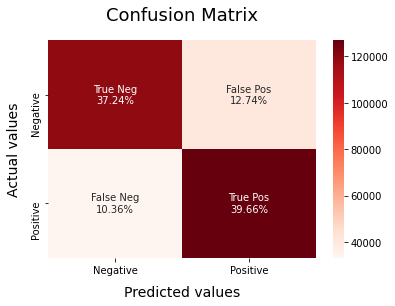

In [ ]:
from sklearn.linear_model import LogisticRegression
# preset logreg parameters
max_iter = 100000
# penalty = 'elasticnet'
# l1_ratio = 0.5
solver = 'saga' # for larger dataset, faster, also supports elasticnet penalty in addition to ridge and lasso
logistic_regression = LogisticRegression(max_iter=max_iter, solver=solver)
evaluate_valset(logistic_regression, X_train, y_train, X_val, y_val)

### SVM Linear Kernel

Accuracy of model on validation set : 76.1428125 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76    159930
           1       0.75      0.78      0.77    160070

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



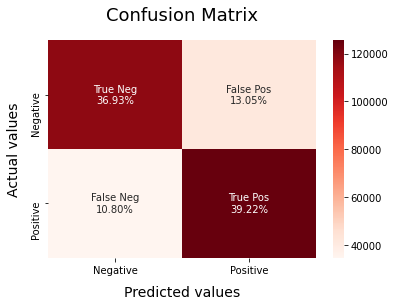

In [ ]:
from sklearn.svm import LinearSVC
svm_linear = LinearSVC(random_state=random_state)
evaluate_valset(svm_linear, X_train, y_train, X_val, y_val)

### SVM Radial bias function (RBF) Kernel - 3hrs 45 min not done yet

In [ ]:
# from sklearn.svm import SVC
# svm_rbf = SVC(random_state=random_state)
# evaluate_valset(svm_rbf, X_train, y_train, X_val, y_val)

### Naive Bayes Bernoulli

Accuracy of model on testing data : 76.06156250000001 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    160239
           1       0.76      0.77      0.76    159761

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



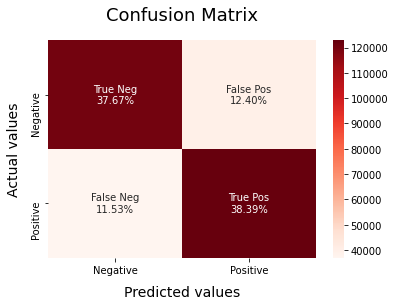

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
evaluate_valset(nb, X_train, y_train, X_val, y_val)

# original

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# def eval_val()
def evaluate(model):

    # fit model
    model.fit(X_train, y_train)

    #accuracy of model on training data
    # acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_cv = model.score(X_cv, y_cv)
    
    # print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_cv*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_cv)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_cv, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_cv, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of model on testing data : 76.8953125 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    160239
           1       0.76      0.79      0.77    159761

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



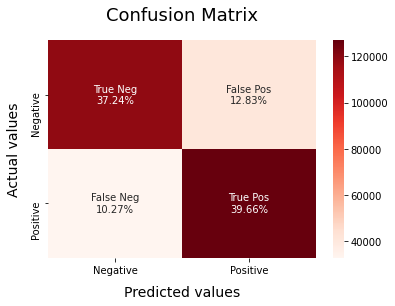

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
evaluate(logistic_regression)

### SVM Linear Kernel

Accuracy of model on testing data : 76.12656249999999 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76    160239
           1       0.75      0.78      0.77    159761

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



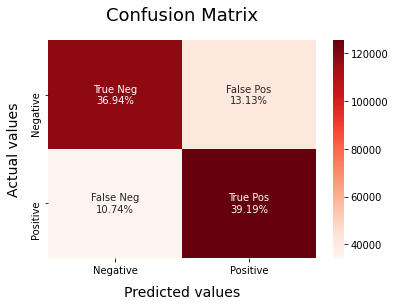

In [ ]:
from sklearn.svm import LinearSVC
svm_linear = LinearSVC()
evaluate(svm_linear)

### Naive Bayes Bernoulli

Accuracy of model on testing data : 76.06156250000001 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    160239
           1       0.76      0.77      0.76    159761

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



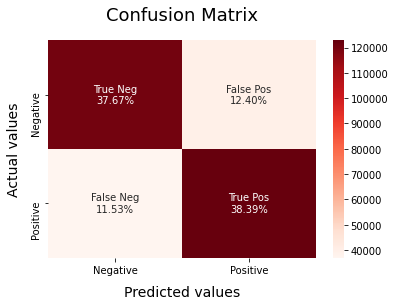

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
evaluate(nb)